In [1]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file_path = './documents/income_tax.pdf'
loader = PyPDFLoader(pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [2]:
pages[35]

Document(metadata={'producer': 'iText 2.1.7 by 1T3XT', 'creator': 'PyPDF', 'creationdate': '2025-01-10T10:55:01+09:00', 'moddate': '2025-01-10T10:55:01+09:00', 'source': './documents/income_tax.pdf', 'total_pages': 133, 'page': 35, 'page_label': '36'}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법 \n② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득 산출세액”이라 한다\n)으로 한다.<개정 2013. 1. 1., 2014. 12. 23.>\n1. 해당 과세기간의 퇴직소득과세표준에 제1항의 세율을 적용하여 계산한 금액\n2. 제1호의 금액을 12로 나눈 금액에 근속연수를 곱한 금액\n3. 삭제<2014. 12. 23.>\n[전문개정 2009. 12. 31.]\n \n           제2관 세액공제 <개정 2009. 12. 31.>\n \n제56조(배당세액공제) ① 거주자의 종합소득금액에 제17조제3항 각 호 외의 부분 단서가 적용되는 배당소득금액이 합\n산되어 있는 경우에는 같은 항 각 호 외의 부분 단서에 따라 해당 과세기간의 총수입금액에 더한 금액에 해당하는\n금액을 종합소득 산출세액에서 공제한다. <개정 2009. 12. 31.>\n② 제1항에 따른 공제를 “배당세액공제”라 한다.<개정 2009. 12. 31.>\n③ 삭제<2003. 12. 30.>\n④ 제1항을 적용할 때 배당세액공제의 대상이 되는 배당소득금액은 제14조제2항의 종합소득과세표준에 포함된 배\n당소득금액으로서 이자소득등의 종합과세기

In [4]:
print(pages[35].page_content)

법제처                                                            36                                                       국가법령정보센터
소득세법 
② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득 산출세액”이라 한다
)으로 한다.<개정 2013. 1. 1., 2014. 12. 23.>
1. 해당 과세기간의 퇴직소득과세표준에 제1항의 세율을 적용하여 계산한 금액
2. 제1호의 금액을 12로 나눈 금액에 근속연수를 곱한 금액
3. 삭제<2014. 12. 23.>
[전문개정 2009. 12. 31.]
 
           제2관 세액공제 <개정 2009. 12. 31.>
 
제56조(배당세액공제) ① 거주자의 종합소득금액에 제17조제3항 각 호 외의 부분 단서가 적용되는 배당소득금액이 합
산되어 있는 경우에는 같은 항 각 호 외의 부분 단서에 따라 해당 과세기간의 총수입금액에 더한 금액에 해당하는
금액을 종합소득 산출세액에서 공제한다. <개정 2009. 12. 31.>
② 제1항에 따른 공제를 “배당세액공제”라 한다.<개정 2009. 12. 31.>
③ 삭제<2003. 12. 30.>
④ 제1항을 적용할 때 배당세액공제의 대상이 되는 배당소득금액은 제14조제2항의 종합소득과세표준에 포함된 배
당소득금액으로서 이자소득등의 종합과세기준금액을 초과하는 것으로 한다.<개정 2009. 12. 31.>
⑤ 삭제<2006. 12. 30.>
⑥ 배당세액공제액의 계산 등에 필요한 사항은 대통령령으로 정한다.<개정 2009. 12. 31.>
[제목개정 2009. 12. 31.]
 
제56조의2(기장세액공제) ① 제160조제3항에 따른 간편장부대상자가 제70조 또는 제74조에 따른 과세표준확정신고를
할 때 복식부기에 따라 기장(記帳)하여 소득금액을 계산하고 제70조제4항제3호에 따른 서류를 제출하는 경우에는
해당 장부에 의하여 계산한 사업소득금액이

In [3]:
from dotenv import load_dotenv

load_dotenv()

True

[zerox](https://github.com/getomni-ai/zerox)

- ocr, llm 을 이용해 문서 인식

깃허브에 전처리된 내용 있으므로 아래 2 셀은 실제로 실행해볼 필요는 없음

In [5]:
import nest_asyncio
nest_asyncio.apply()

In [9]:
from pyzerox import zerox
import os
import json
import asyncio

### 모델 설정 (Vision 모델만 사용) 참고: https://docs.litellm.ai/docs/providers ###

## 일부 모델에 필요할 수 있는 추가 모델 kwargs의 자리 표시자
kwargs = {}

## Vision 모델에 사용할 시스템 프롬프트
custom_system_prompt = None

model = "gpt-4o-mini"

# 메인 비동기 진입점을 정의합니다
async def main():
    file_path = "./documents/income_tax.pdf" ## 로컬 파일 경로 및 파일 URL 지원

    ## 일부 페이지 또는 전체 페이지를 처리
    select_pages = None ## 전체는 None, 특정 페이지는 int 또는 list(int) 페이지 번호 (1부터 시작)

    output_dir = "./documents" ## 통합된 마크다운 파일을 저장할 디렉토리
    result = await zerox(
        file_path=file_path,
        model=model,
        output_dir=output_dir,
        custom_system_prompt=custom_system_prompt,
        select_pages=select_pages,
        **kwargs
    )
    return result


# 메인 함수를 실행합니다:
result = asyncio.run(main())

# 마크다운 결과를 출력합니다
print(result)

ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.I

ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.I

ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-RCF6KO2QXqIjRpKCywAH9Gu9 on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



KeyboardInterrupt: 

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 100,
    separators=['\n\n', '\n']
)

In [11]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

마크다운 로더를 그대로 사용하면 표가 잘릴 수 있다.

> 표가 실제 표가 아니라 단순한 텍스트이므로

이럴 때는 마크다운 -> txt로 변환 -> load -> split

In [12]:
import markdown
from bs4 import BeautifulSoup

text_path = './documents/income_tax.txt'

# 마크다운 파일을 읽어옵니다
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

# 마크다운 콘텐츠를 HTML로 변환합니다
html_content = markdown.markdown(md_content)

# HTML 콘텐츠를 파싱하여 텍스트만 추출합니다
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# 추출한 텍스트를 텍스트 파일로 저장합니다
with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")

Markdown converted to plain text successfully!


In [13]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)

In [14]:
from langchain_upstage import UpstageEmbeddings

embeddings = UpstageEmbeddings(model='solar-embedding-1-large')

In [15]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name = 'income_tax_collection',
    persist_directory = './income_tax_collection'
)

In [16]:
retriever = vector_store.as_retriever(search_kwargs={'k':3})

In [17]:
query = '연봉 5천만원 직장인의 소득세는?'

In [18]:
retriever.invoke(query)

[Document(id='8ffc8a86-a526-43bf-b74b-3d14634fbcda', metadata={'source': './documents/income_tax.txt'}, page_content='130만원 이하   \n산출세액의 10분의 55 \n130만원 초과   \n71천원과 (130만원을 초과하는 금액의 10분의 30)  \n\n② 제1항에 대하여 공제받는 다음 각 호의 계산에 따른 금액을 초과하는 경우에 초과하는 금액은 없는 것으로 한다. <신설 2014. 1. 1., 2015. 5. 13., 2022. 12. 31.>\n1. 총급여액이 3천만원 이하인 경우: 74천원 = (총급여액 - 300만원) × 8/1000. 단, 위 금액은 적은 경우 6천원으로 한다.\n2. 총급여액이 3천만원 초과 7천만원 이하인 경우: 66천원 = (총급여액 - 7천만원) × 1/2. 단, 위 금액이 50만원보다 적은 경우에는 50만원으로 한다.\n3. 총급여액이 1억원 미만일 경우에는 경우: 50만원 = (총급여액 - 1억원) × 1/2. 단, 위 금액이 20만원보다 적은 경우에는 20만원으로 한다.\n4. 일금공로자의 근로소득에 대해 제134조제3항에 대한 원천징수를 하는 경우에는 해도 근로소득에 대한 산출세액의 100세 50에 해당하는 금액은 그 산출세액에 적용된다. <개정 2014. 1. 1.>\n[전문개정 2021. 1.]  \n제59조2의2(자산세예고제)\n① 종합소득에 있는 거주자이기 근로제대상자에 해당하는 자녀(입장 및 위탁아동을 포함하며, 이하 이 조에서 "공제대상자"라 한다) 및 소득세법 제57조 이상의 사례에 대해서는 다음 각 호의 구분에 따른 금액을 종합소득세법에 공제받는다. <개정 2015. 5. 13., 2017. 12. 31., 2018. 12. 19., 2019. 12. 31., 2022. 12. 31., 2023. 12. 31.>  \n\n1명인 경우: 연 15만원\n2명인 경우: 연 35만원\n3명 이상인 경우: 연 35만원과

In [19]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [20]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [25]:
def retrieve(state: AgentState) -> AgentState:
    """
    사용자의 질문에 기반하여 벡터 스토어에서 관련 문서를 검색합니다.

    Args:
        state (AgentState): 사용자의 질문을 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 검색된 문서가 추가된 state를 반환합니다.
    """
    query = state['query']  # state에서 사용자의 질문을 추출합니다.
    docs = retriever.invoke(query)  # 질문과 관련된 문서를 검색합니다.
    return {'context': docs}  # 검색된 문서를 포함한 state를 반환합니다.

LangChain의 hub를 통해 미리 정의된 RAG 프롬프트를 활용합니다
- hub에는 이미 검증된 프롬프트들이 많기 때문에 프로젝트 진행 시 좋은 시작점이 됩니다
- hub에서 프롬프트를 찾아보고, 동작을 확인한 후 커스텀 하는 것을 권장합니다

In [22]:
from langchain import hub
from langchain_upstage import ChatUpstage
prompt = hub.pull("rlm/rag-prompt")
llm = ChatUpstage(model='solar-pro2')

In [23]:
def generate(state: AgentState) -> AgentState:
    """
    사용자의 질문과 검색된 문서를 기반으로 응답을 생성합니다.

    Args:
        state (AgentState): 사용자의 질문과 검색된 문서를 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 생성된 응답이 추가된 state를 반환합니다.
    """
    context = state['context']  # state에서 검색된 문서를 추출합니다.
    query = state['query']  # state에서 사용자의 질문을 추출합니다.
    rag_chain = prompt | llm  # RAG 프롬프트와 LLM을 연결하여 체인을 만듭니다.
    response = rag_chain.invoke({'question': query, 'context': context})  # 질문과 문맥을 사용하여 응답을 생성합니다.
    return {'answer': response}  # 생성된 응답을 포함한 state를 반환합니다.

In [26]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [27]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [28]:
graph = graph_builder.compile()


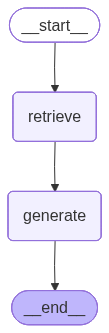

In [29]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
initial_state = {'query': query}
graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(id='8ffc8a86-a526-43bf-b74b-3d14634fbcda', metadata={'source': './documents/income_tax.txt'}, page_content='130만원 이하   \n산출세액의 10분의 55 \n130만원 초과   \n71천원과 (130만원을 초과하는 금액의 10분의 30)  \n\n② 제1항에 대하여 공제받는 다음 각 호의 계산에 따른 금액을 초과하는 경우에 초과하는 금액은 없는 것으로 한다. <신설 2014. 1. 1., 2015. 5. 13., 2022. 12. 31.>\n1. 총급여액이 3천만원 이하인 경우: 74천원 = (총급여액 - 300만원) × 8/1000. 단, 위 금액은 적은 경우 6천원으로 한다.\n2. 총급여액이 3천만원 초과 7천만원 이하인 경우: 66천원 = (총급여액 - 7천만원) × 1/2. 단, 위 금액이 50만원보다 적은 경우에는 50만원으로 한다.\n3. 총급여액이 1억원 미만일 경우에는 경우: 50만원 = (총급여액 - 1억원) × 1/2. 단, 위 금액이 20만원보다 적은 경우에는 20만원으로 한다.\n4. 일금공로자의 근로소득에 대해 제134조제3항에 대한 원천징수를 하는 경우에는 해도 근로소득에 대한 산출세액의 100세 50에 해당하는 금액은 그 산출세액에 적용된다. <개정 2014. 1. 1.>\n[전문개정 2021. 1.]  \n제59조2의2(자산세예고제)\n① 종합소득에 있는 거주자이기 근로제대상자에 해당하는 자녀(입장 및 위탁아동을 포함하며, 이하 이 조에서 "공제대상자"라 한다) 및 소득세법 제57조 이상의 사례에 대해서는 다음 각 호의 구분에 따른 금액을 종합소득세법에 공제받는다. <개정 2015. 5. 13., 2017. 12. 31., 2018. 12. 19., 2019. 12. 31., 2022. 12. 31., 2023. 12. 31.>  \n\n1명인 경우